1) importation de la bibliothèque pandas

In [2]:
import pandas as pd

2) Charger le fichier "country.csv" et afficher le dataframe 

In [3]:
dataframe=pd.read_csv("country.csv")
dataframe

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


3) Vérifier l'existence de valeurs nulls dans le dataframe

In [4]:
dataframe.isnull().sum()

country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

4)
* Renommer les colonnes (pop, lifeExp, gdpPercap) par (Population, Age, PIB)
* Afficher le dataframe

In [4]:
dataframe=dataframe.rename(columns={'pop':'Population',"lifeExp":"Age","gdpPercap":"PIB"})
dataframe

,country,year,Population,continent,Age,PIB
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


5) Afficher le nombre de pays pour chaque continent

In [10]:
dataframe.groupby("continent").country.nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [16]:
dataframe.groupby("continent").first()#5 dataframe

,country,year,pop,Age,PIB
continent,,,,,
Africa,Algeria,1952,9279525.0,43.077,2449.008185
Americas,Argentina,1952,17876956.0,62.485,5911.315053
Asia,Afghanistan,1952,8425333.0,28.801,779.445314
Europe,Albania,1952,1282697.0,55.230,1601.056136
Oceania,Australia,1952,8691212.0,69.120,10039.595640


6) Pour chaque contient, vérifier l'existence de valeurs abbérantes pour la variable Age

<AxesSubplot:title={'center':'Age'}, xlabel='continent'>

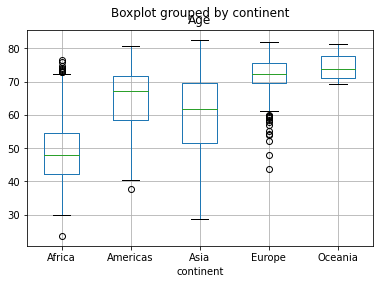

In [18]:
dataframe.boxplot('Age', by='continent')


7) Pour le contient Africa, afficher le dataframe (df1) contenant les pays dont la variable Age est une valeur abbérante.  

In [11]:
df=dataframe[dataframe["continent"]=="Africa"]
df

,country,year,Population,continent,Age,PIB
24,Algeria,1952,9279525.0,Africa,43.077,2449.008185
25,Algeria,1957,10270856.0,Africa,45.685,3013.976023
26,Algeria,1962,11000948.0,Africa,48.303,2550.816880
27,Algeria,1967,12760499.0,Africa,51.407,3246.991771
28,Algeria,1972,14760787.0,Africa,54.518,4182.663766
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [12]:
IRQ=df.Age.quantile(0.75)-df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)
q1=df.Age.quantile(0.25)
#pour determiner les valeurs aberante

upperlimit=q3+(IRQ*1.5)
lowerlimit=q1-(IRQ*1.5)

df1=df[(df.Age<lowerlimit) | (df.Age>upperlimit)]
df1

,country,year,Population,continent,Age,PIB
910,Libya,2002,5368585.0,Africa,72.737,9534.677467
911,Libya,2007,6036914.0,Africa,73.952,12057.499280
983,Mauritius,2007,1250882.0,Africa,72.801,10956.991120
1268,Reunion,1992,622191.0,Africa,73.615,6101.255823
1269,Reunion,1997,684810.0,Africa,74.772,6071.941411
1270,Reunion,2002,743981.0,Africa,75.744,6316.165200
1271,Reunion,2007,798094.0,Africa,76.442,7670.122558
1292,Rwanda,1992,7290203.0,Africa,23.599,737.068595
1570,Tunisia,2002,9770575.0,Africa,73.042,5722.895655
1571,Tunisia,2007,10276158.0,Africa,73.923,7092.923025


8) Pour l'année 2007, vérifier pour chaque continent l'existence de valeurs abbérantes pour la variable PIB.

<AxesSubplot:title={'center':'PIB'}, xlabel='continent'>

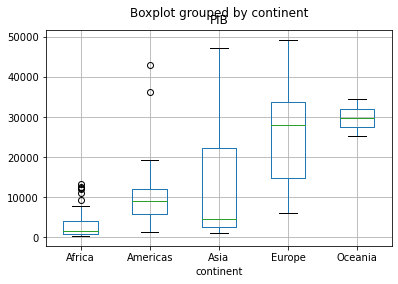

In [48]:
dataframe[dataframe['year']==2007].boxplot('PIB', by='continent')

9) Afficher dans une nouvelle dataframe (df2), les pays du continent Africa ayant la variable PIB comme valeur abbérante en 2007

In [61]:
df2 = dataframe[(dataframe.continent == 'Africa') & (dataframe.year == 2007)]
IRQ=df2.PIB.quantile(0.75)-df2.PIB.quantile(0.25)
q3=df2.PIB.quantile(0.75)
q1=df2.PIB.quantile(0.25)
#pour determiner les valeurs aberante

upperlimite=q3+(IRQ*1.5)
lowerlimite=q1-(IRQ*1.5)
df3=df2[(df2.PIB<lowerlimit) | (df2.PIB>upperlimit)]
df3

,country,year,pop,continent,Age,PIB
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
167,Botswana,2007,1639131.0,Africa,50.728,12569.851770
467,Egypt,2007,80264543.0,Africa,71.338,5581.180998
491,Equatorial Guinea,2007,551201.0,Africa,51.579,12154.089750
551,Gabon,2007,1454867.0,Africa,56.735,13206.484520
911,Libya,2007,6036914.0,Africa,73.952,12057.499280
983,Mauritius,2007,1250882.0,Africa,72.801,10956.991120
1067,Namibia,2007,2055080.0,Africa,52.906,4811.060429
1271,Reunion,2007,798094.0,Africa,76.442,7670.122558
1415,South Africa,2007,43997828.0,Africa,49.339,9269.657808


10) 
* Dans une nouvelle DataFrame, garder seulement les colonnes ('continent', 'year', 'Population') et les années 1952 et 2007
* Afficher la population totale de chaque continent pour les années 1952 et 2007

SyntaxError: invalid syntax (Temp/ipykernel_14360/3341511442.py, line 1)

In [13]:
df4=dataframe[['continent', 'year', 'Population']]
df4.head()

,continent,year,Population
0,Asia,1952,8425333.0
1,Asia,1957,9240934.0
2,Asia,1962,10267083.0
3,Asia,1967,11537966.0
4,Asia,1972,13079460.0


In [15]:
df5=df4[(df4.year==2007)| (df4.year==1952)]
df5.groupby("continent").Population.sum()

continent
Africa      1.167180e+09
Americas    1.244024e+09
Asia        5.207311e+09
Europe      1.004219e+09
Oceania     3.523595e+07
Name: Population, dtype: float64

In [82]:
df5= df4[(df4.year ==2007) | (df4.year == 1952)]
df5
df5.Population.sum()
df6=df5.groupby(['continent']).Population
df6.sum()

continent
Africa      1.167180e+09
Americas    1.244024e+09
Asia        5.207311e+09
Europe      1.004219e+09
Oceania     3.523595e+07
Name: Population, dtype: float64

In [ ]:
df.groupby([])

10) Afficher sous forme de barres verticales (histogrammes) la population totale de chaque continent pour les année 1952 et 2007

continent
Africa      AxesSubplot(0.125,0.125;0.775x0.755)
Americas    AxesSubplot(0.125,0.125;0.775x0.755)
Asia        AxesSubplot(0.125,0.125;0.775x0.755)
Europe      AxesSubplot(0.125,0.125;0.775x0.755)
Oceania     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Population, dtype: object

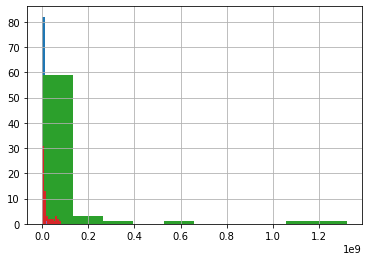

In [83]:
df6.hist()

11) Afficher pour chaque continent, le pays qui la plus grande valeur de PIB en 2007

In [17]:
df6= dataframe[(df4.year ==2007)]
df7=df6.groupby(['continent']).PIB.max()
df8=pd.merge(df6,df7)
df8

,country,year,Population,continent,Age,PIB
0,Australia,2007,20434176.0,Oceania,81.235,34435.36744
1,Gabon,2007,1454867.0,Africa,56.735,13206.48452
2,Kuwait,2007,2505559.0,Asia,77.588,47306.98978
3,Norway,2007,4627926.0,Europe,80.196,49357.19017
4,United States,2007,301139947.0,Americas,78.242,42951.65309


In [90]:
df8= dataframe[(df4.year ==2007)]
df6

,country,year,Population,continent,Age,PIB
11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
23,Albania,2007,3600523.0,Europe,76.423,5937.029526
35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
47,Angola,2007,12420476.0,Africa,42.731,4797.231267
59,Argentina,2007,40301927.0,Americas,75.320,12779.379640
...,...,...,...,...,...,...
1655,Vietnam,2007,85262356.0,Asia,74.249,2441.576404
1667,West Bank and Gaza,2007,4018332.0,Asia,73.422,3025.349798
1679,Yemen Rep.,2007,22211743.0,Asia,62.698,2280.769906
1691,Zambia,2007,11746035.0,Africa,42.384,1271.211593
